# Analise 

In [6]:
import os

path = '../Scenario 3 - all change/data_base/Scenario-03/'
dirs = os.listdir(path)
dirs

['Scenario-03_median_10',
 'Scenario-03_average_30',
 'Scenario-03_zero_30',
 'Scenario-03_zero_70',
 'Scenario-03_median_50',
 'Scenario-03_average_70',
 'Scenario-03_zero_50',
 'Scenario-03_median_70',
 'Scenario-03_average_50',
 'Scenario-03_median_30',
 'Scenario-03_average_10',
 'Scenario-03_zero_10']

In [95]:
import numpy as np
import pandas as pd

data = {}
data['tipo'] = []
data['percentual'] = []
data['F1'] = []
data['pesos'] = []
data['kernel_names'] = []

for dir in dirs:
    # print('DIR', dir)
    mean_f1 = []
    weights = []
    for iter in os.listdir(path+dir):
        # print('ITER', iter)
        f1_file = path+dir+'/'+iter+'/F1_score.txt'
        f1 = np.loadtxt(f1_file)
        mean_f1.append(f1.mean())

        pesos        = np.loadtxt(path+dir+'/'+iter+'/pairwise_kernel_weights.txt').mean(axis=0)
        weights.append(pesos)
        kernel_names = open(path+dir+'/'+iter+'/pairwise_kernel_names.txt','r').read().split('\t')
        partes = dir.split('_')

    data['tipo'].append(partes[1])
    data['percentual'].append(int(partes[2]))
    data['F1'].append(np.mean(mean_f1))
    data['pesos'].append(np.mean(weights, axis=0))
    data['kernel_names'].append(kernel_names)


df = pd.DataFrame(data=data)
df

,tipo,percentual,F1,pesos,kernel_names
0,median,10,0.603812,"[-6.607625168993367e-10, -6.423626386361722e-1...",[Modified_median_10_Kd_PubChem.txt_KRONECKER_M...
1,average,30,0.593713,"[1.1090985110776788e-09, 6.566769476237578e-09...",[Modified_average_30_Kd_PubChem.txt_KRONECKER_...
2,zero,30,0.530130,"[4.6281167742659946e-08, 0.0007348337924921399...",[Modified_zero_30_Kd_PubChem.txt_KRONECKER_Mod...
3,zero,70,0.478331,"[1.517349778407336e-07, 0.0013806195640030546,...",[Modified_zero_70_Kd_PubChem.txt_KRONECKER_Mod...
4,median,50,0.581394,"[3.916667648008931e-09, 1.9683407501925052e-08...",[Modified_median_50_Kd_PubChem.txt_KRONECKER_M...
5,average,70,0.579875,"[1.913330104340411e-09, 1.1860220459384222e-08...",[Modified_average_70_Kd_PubChem.txt_KRONECKER_...
6,zero,50,0.499740,"[0.0009840937354764368, 0.0035398225503769534,...",[Modified_zero_50_Kd_PubChem.txt_KRONECKER_Mod...
7,median,70,0.588694,"[2.8710243880506185e-10, 1.2581962717059267e-0...",[Modified_median_70_Kd_PubChem.txt_KRONECKER_M...
8,average,50,0.592168,"[-3.3476193892258877e-10, 7.044754901268078e-0...",[Modified_average_50_Kd_PubChem.txt_KRONECKER_...
9,median,30,0.593312,"[1.5806334247935368e-09, 2.9853187500452296e-0...",[Modified_median_30_Kd_PubChem.txt_KRONECKER_M...


In [96]:
df[df['percentual'] == 50]

,tipo,percentual,F1,pesos,kernel_names
4,median,50,0.581394,"[3.916667648008931e-09, 1.9683407501925052e-08...",[Modified_median_50_Kd_PubChem.txt_KRONECKER_M...
6,zero,50,0.499740,"[0.0009840937354764368, 0.0035398225503769534,...",[Modified_zero_50_Kd_PubChem.txt_KRONECKER_Mod...
8,average,50,0.592168,"[-3.3476193892258877e-10, 7.044754901268078e-0...",[Modified_average_50_Kd_PubChem.txt_KRONECKER_...


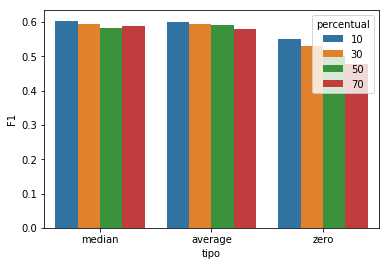

In [97]:
import seaborn as sns
sns.barplot(x='tipo', y='F1', data=df, hue='percentual')

In [131]:
def plot_heatmap(dataframe, percentual=10, tipo='zero'):

    # testando com 50% e tipo=zero
    pesos = dataframe[(dataframe['percentual'] == percentual) \
                    & (dataframe['tipo'] == tipo)]['pesos'].values[0]
    kernel_names = dataframe[(dataframe['percentual'] == percentual) \
                           & (dataframe['tipo'] == tipo)]['kernel_names'].values[0]
    # assumindo que kernel_names nao muda em cada execucao
    kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
    kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
    pesos = dataframe[(dataframe['percentual'] == 50) \
                    & (dataframe['tipo'] == 'zero')]['pesos'].values[0]

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': pesos} )

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()

    sns.heatmap(matrix)



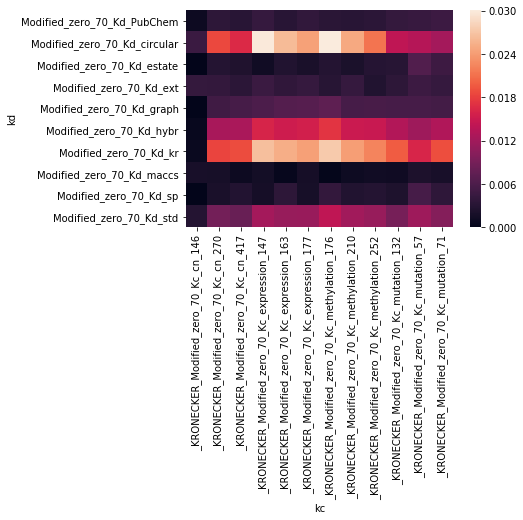

In [132]:
plot_heatmap(df, percentual=70, tipo='zero')

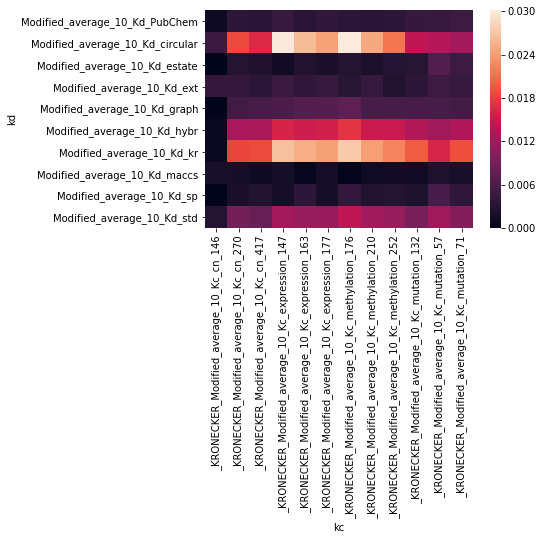

In [135]:
plot_heatmap(df, percentual=10, tipo='average')

,kd,kc,peso
